In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [53]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
# print(breast_cancer_wisconsin_original.variables) 


In [54]:
df=pd.concat([x,y],axis=1)
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [55]:
df.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

# Find null value

In [56]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

<Axes: ylabel='Bare_nuclei'>

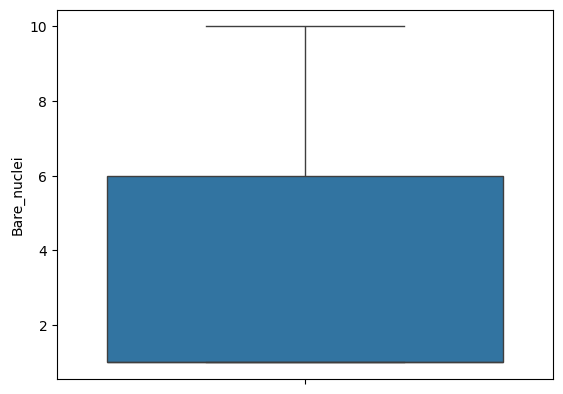

In [57]:
sns.boxplot(df["Bare_nuclei"])

# fill null values

In [58]:
df.Bare_nuclei=df.Bare_nuclei.fillna(int(df.Bare_nuclei.mean()))

In [59]:
df.isnull().sum()/df.shape[0]*100

Clump_thickness                0.0
Uniformity_of_cell_size        0.0
Uniformity_of_cell_shape       0.0
Marginal_adhesion              0.0
Single_epithelial_cell_size    0.0
Bare_nuclei                    0.0
Bland_chromatin                0.0
Normal_nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

In [60]:
df.Bare_nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [61]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [62]:
df.Bare_nuclei=df.Bare_nuclei.astype(int)

In [63]:
df.dtypes

Clump_thickness                int64
Uniformity_of_cell_size        int64
Uniformity_of_cell_shape       int64
Marginal_adhesion              int64
Single_epithelial_cell_size    int64
Bare_nuclei                    int64
Bland_chromatin                int64
Normal_nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [64]:
df.Class.unique()

array([2, 4])

# Visualization 

In [65]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [66]:
x.shape

(699, 9)

In [67]:
y.shape

(699,)

<Axes: >

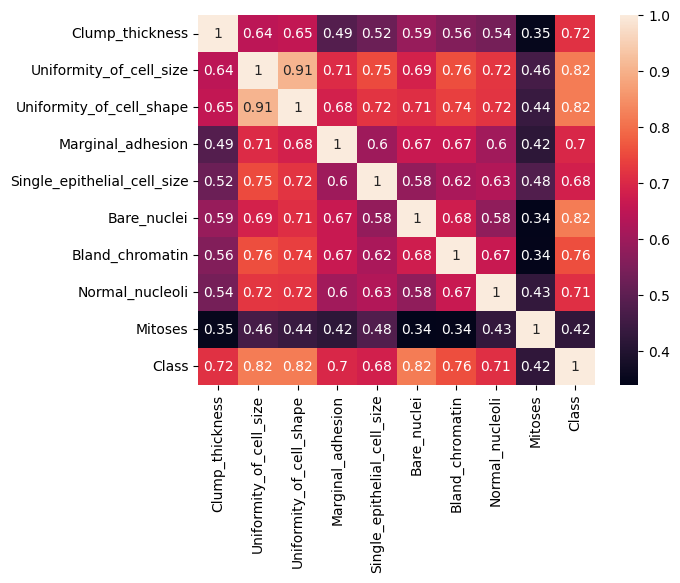

In [68]:
sns.heatmap(df.corr(),annot=True)

# convert 2 and 4 into 0 and 1

In [69]:
df.Class=df.Class.map({2:0,4:1})

<Axes: xlabel='Class', ylabel='count'>

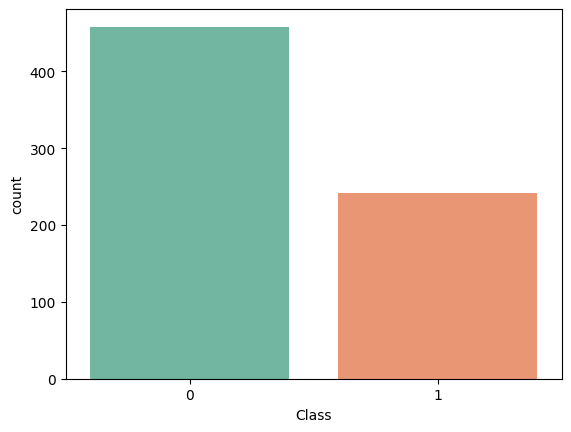

In [70]:
sns.countplot(x='Class',data=df,palette='Set2')                                                                           

In [71]:
df.Class.value_counts()

Class
0    458
1    241
Name: count, dtype: int64

In [72]:
df.Class.value_counts(normalize=True)

Class
0    0.655222
1    0.344778
Name: proportion, dtype: float64

 # Example: Scatter plot of 'ClumpThickness' vs 'UniformityCellSize'

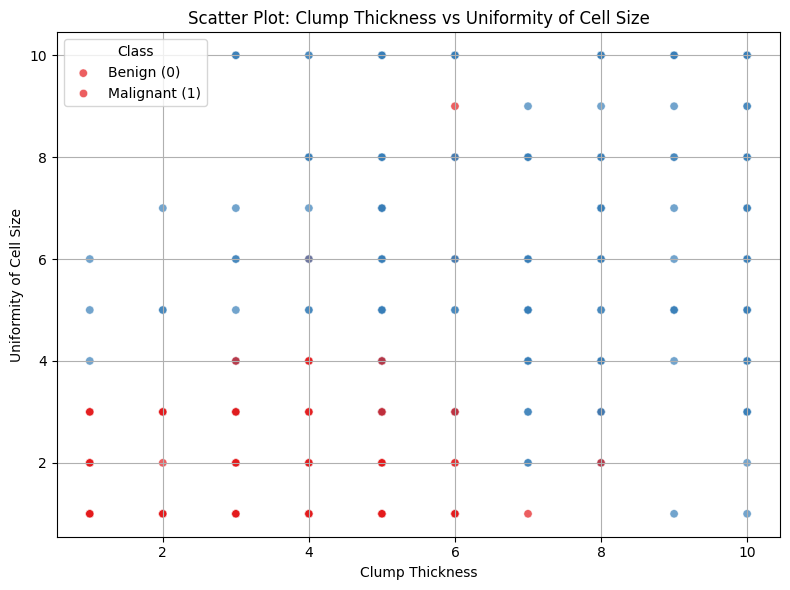

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Clump_thickness',y='Uniformity_of_cell_size',hue='Class',palette='Set1',alpha=0.7)
plt.title("Scatter Plot: Clump Thickness vs Uniformity of Cell Size")
plt.xlabel("Clump Thickness")
plt.ylabel("Uniformity of Cell Size")
plt.legend(title='Class', labels=['Benign (0)', 'Malignant (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


# Train Test Split

In [73]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
sm=SMOTE(random_state=42)
x_re_train,y_re_train=sm.fit_resample(x_train,y_train)

In [76]:
print(x_re_train.shape,x_train.shape)
print(y_re_train.shape,y_train.shape)

(630, 9) (489, 9)
(630,) (489,)


# Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train=sc.fit_transform(x_re_train)
x_test=sc.transform(x_test)
y_train=y_re_train

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


# Step 4: Train and Evaluate Models (Using Loop)

In [79]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc * 100
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Decision Tree
Accuracy: 0.9381
[[136   7]
 [  6  61]]
              precision    recall  f1-score   support

           2       0.96      0.95      0.95       143
           4       0.90      0.91      0.90        67

    accuracy                           0.94       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210


Model: Logistic Regression
Accuracy: 0.9667
[[141   2]
 [  5  62]]
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210


Model: Naive Bayes
Accuracy: 0.9619
[[137   6]
 [  2  65]]
              precision    recall  f1-score   support

           2       0.99      0.96      0.97       143
           4       0.92      0.97      0.94    

# K-Fold cross validation

In [80]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
cv_score=cross_val_score(RandomForestClassifier(),x,y,cv=kf)
print(cv_score.mean()*100)

97.13664596273294


# Visualization

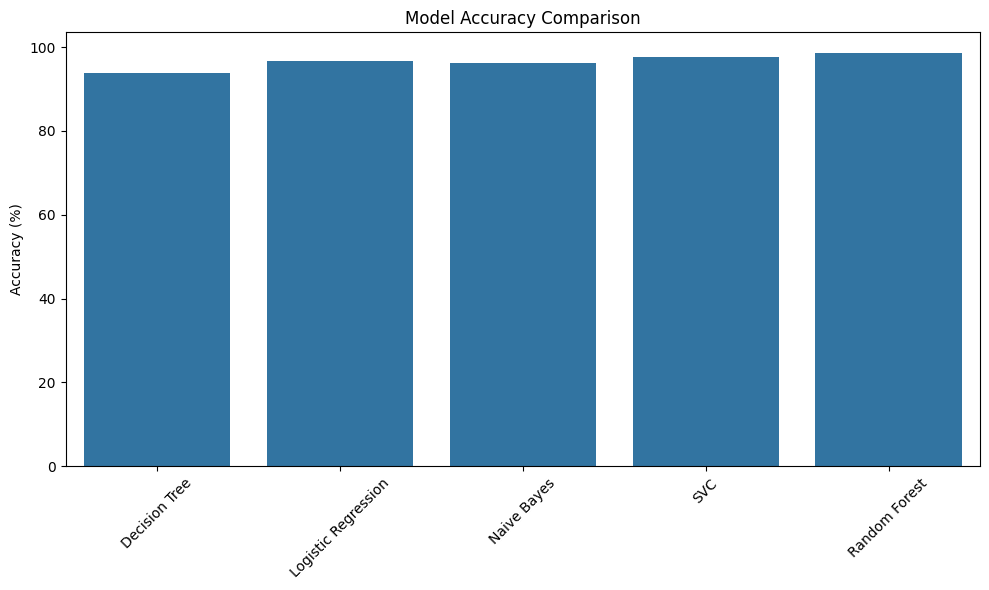

In [81]:
 plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()

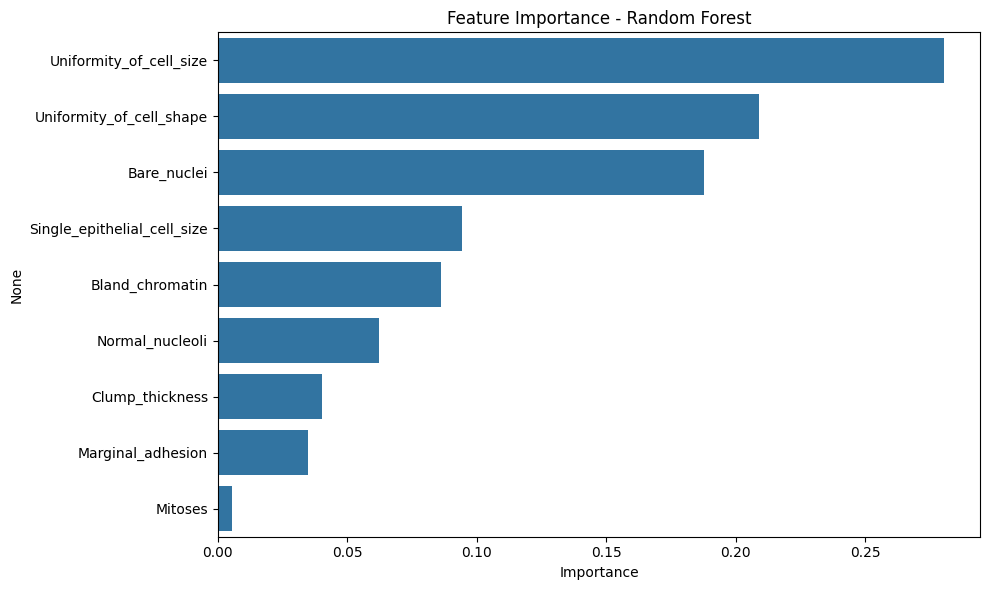

In [82]:
# Feature Importance Plot (Random Forest)
if name == "Random Forest":
    importances = model.feature_importances_
    # then plot the feature importance

    feature_names = df.drop("Class", axis=1).columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=feature_names[indices])
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

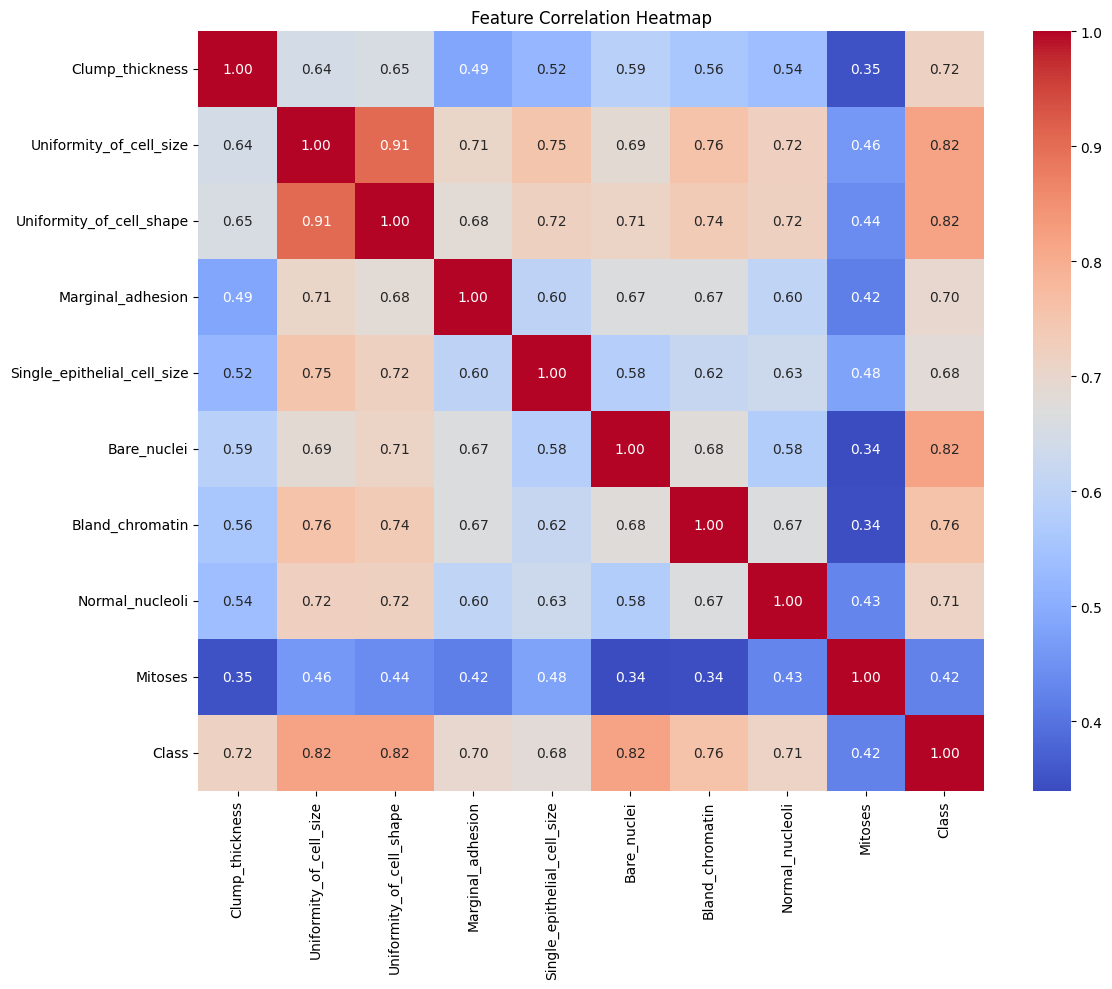

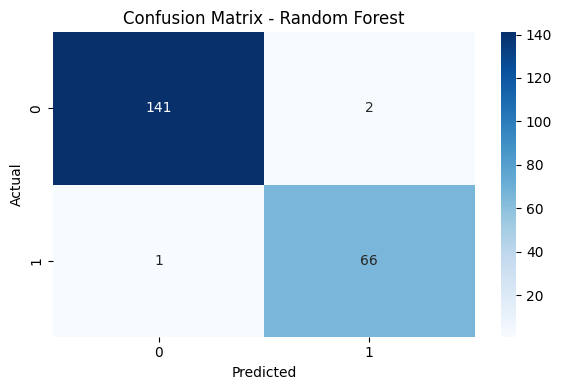

In [83]:
# Step 7: Optional but Useful



# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Confusion Matrix for Random Forest
if model:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Random Forest")
    plt.tight_layout()
    plt.show()


# Trough this project, we found that random forest gave the best prediction performance(97%) on the breast cancer dataset. Using SMOTE significantly improved the detection of malignant tumors. Cell size, shape, and clump thickness were the most important biological indicators. These isights can help in building reliable AI-based medical tools.

# The model can help in early and accurate detection of breast canser.